Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [76]:
df = pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [77]:
df.rename(columns={'Unnamed: 0':'City'},inplace=True)

In [78]:
df.drop(columns=['City'],inplace=True)

In [79]:
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [80]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [81]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

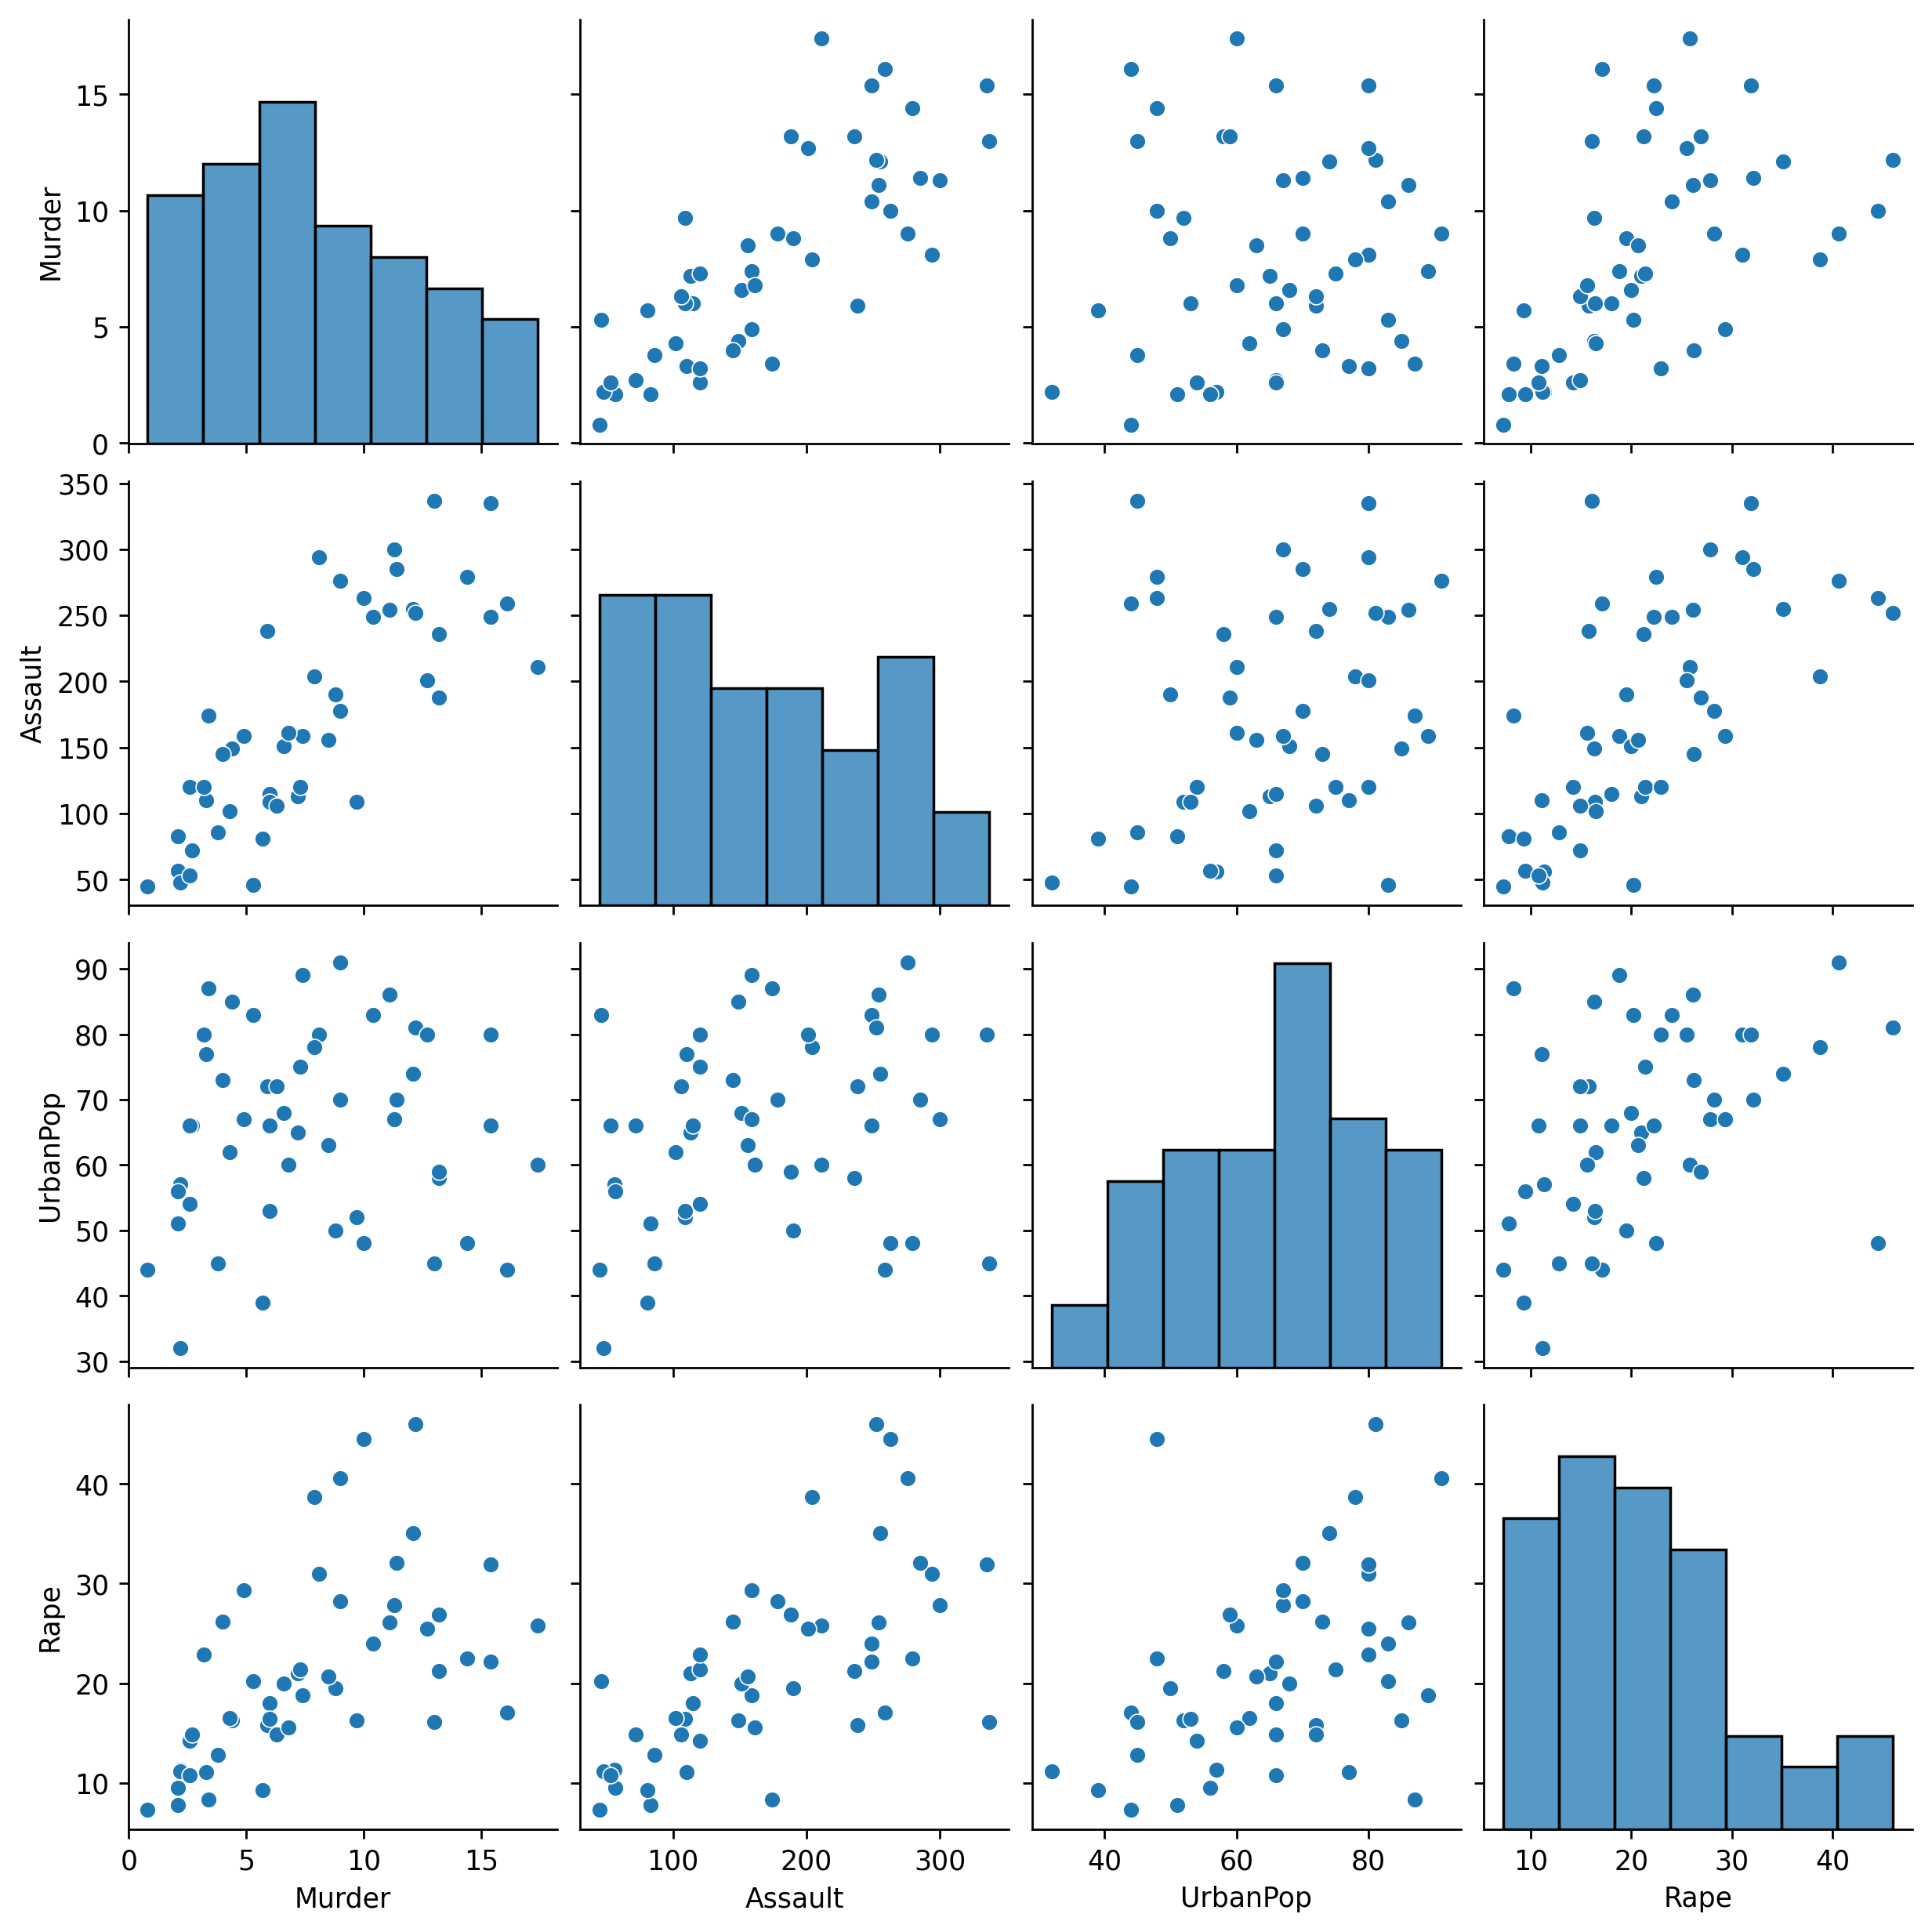

In [82]:
sns.pairplot(df)

# Feature Scaling

In [83]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [84]:
#Dendrogram with single and complite Linkage

In [85]:
from scipy.cluster import hierarchy

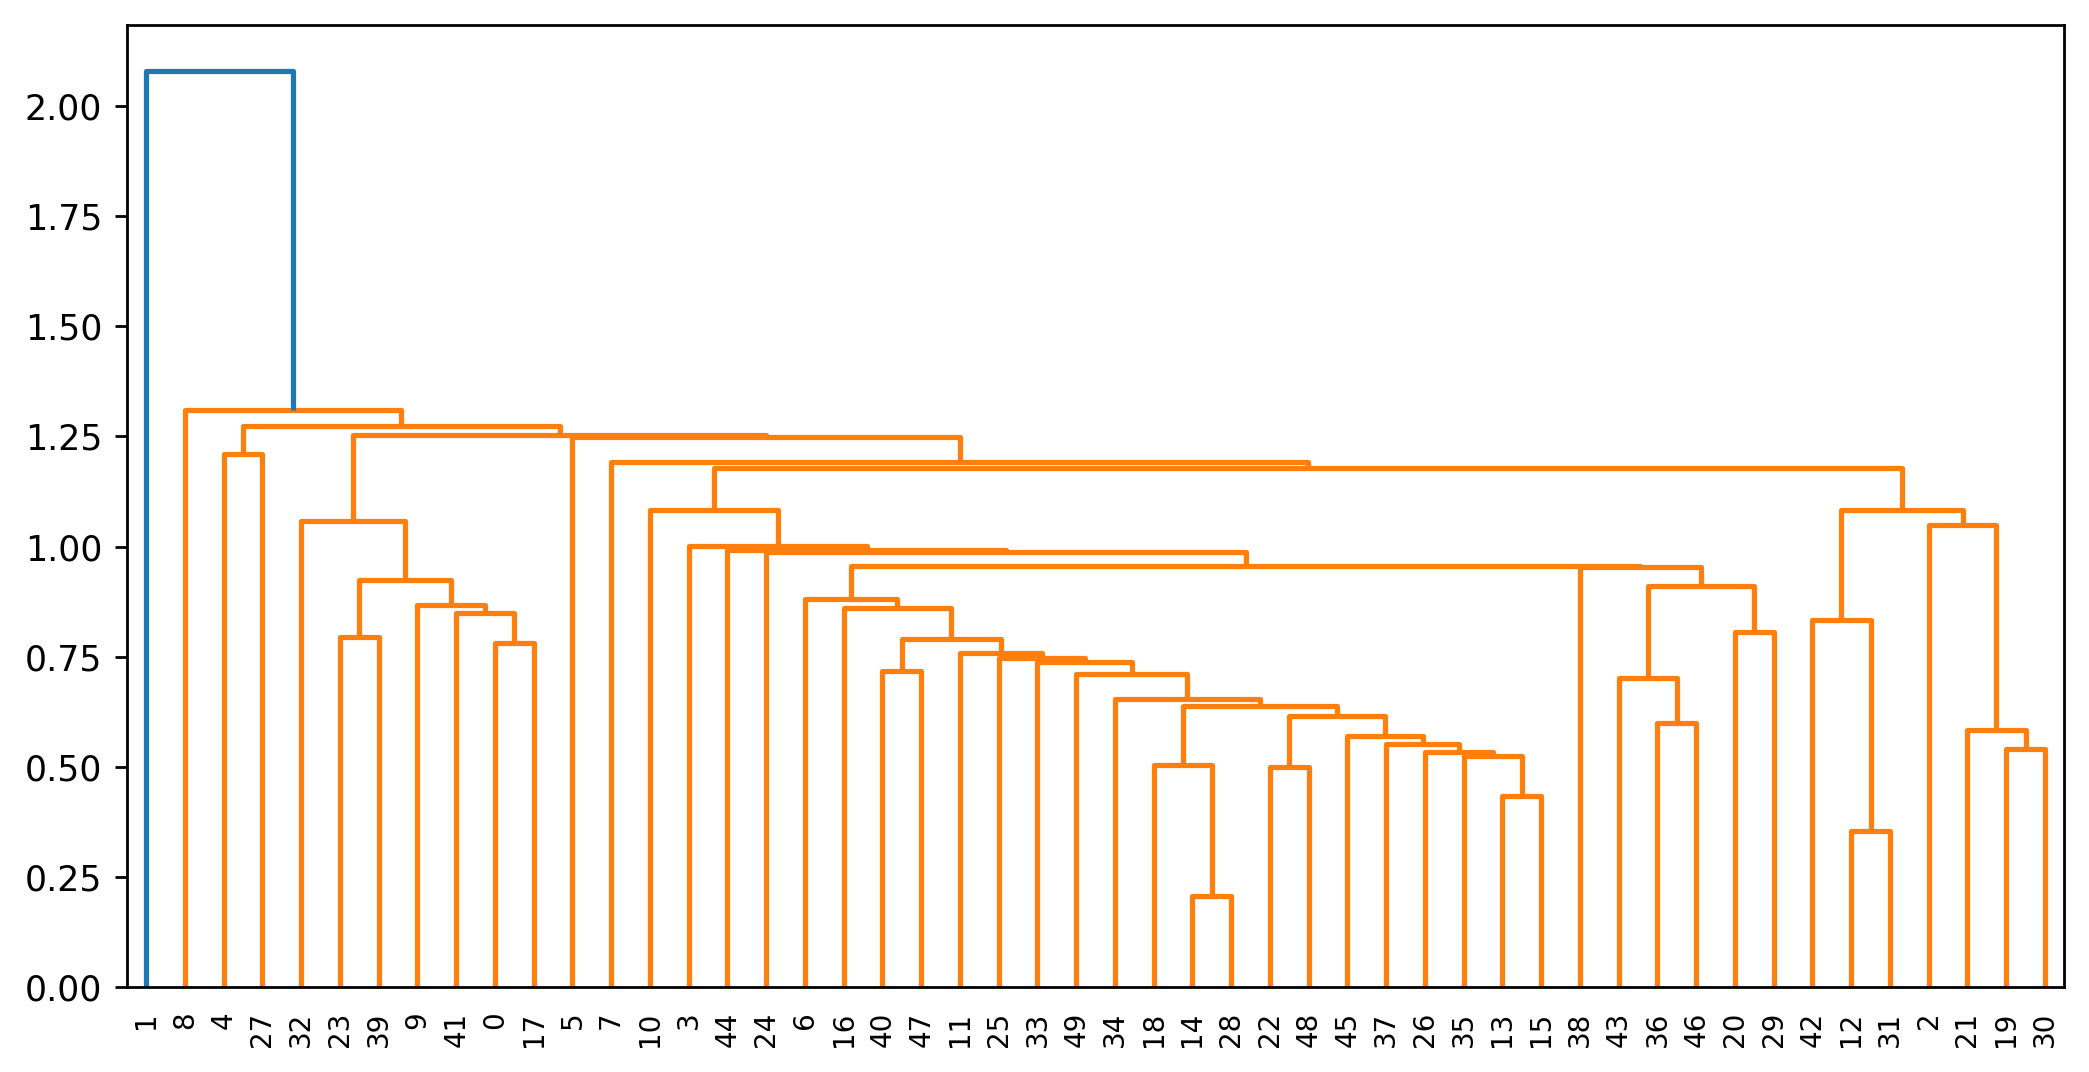

In [86]:
lk = hierarchy.linkage(x,method='single')
dendro = hierarchy.dendrogram(lk)
plt.show()


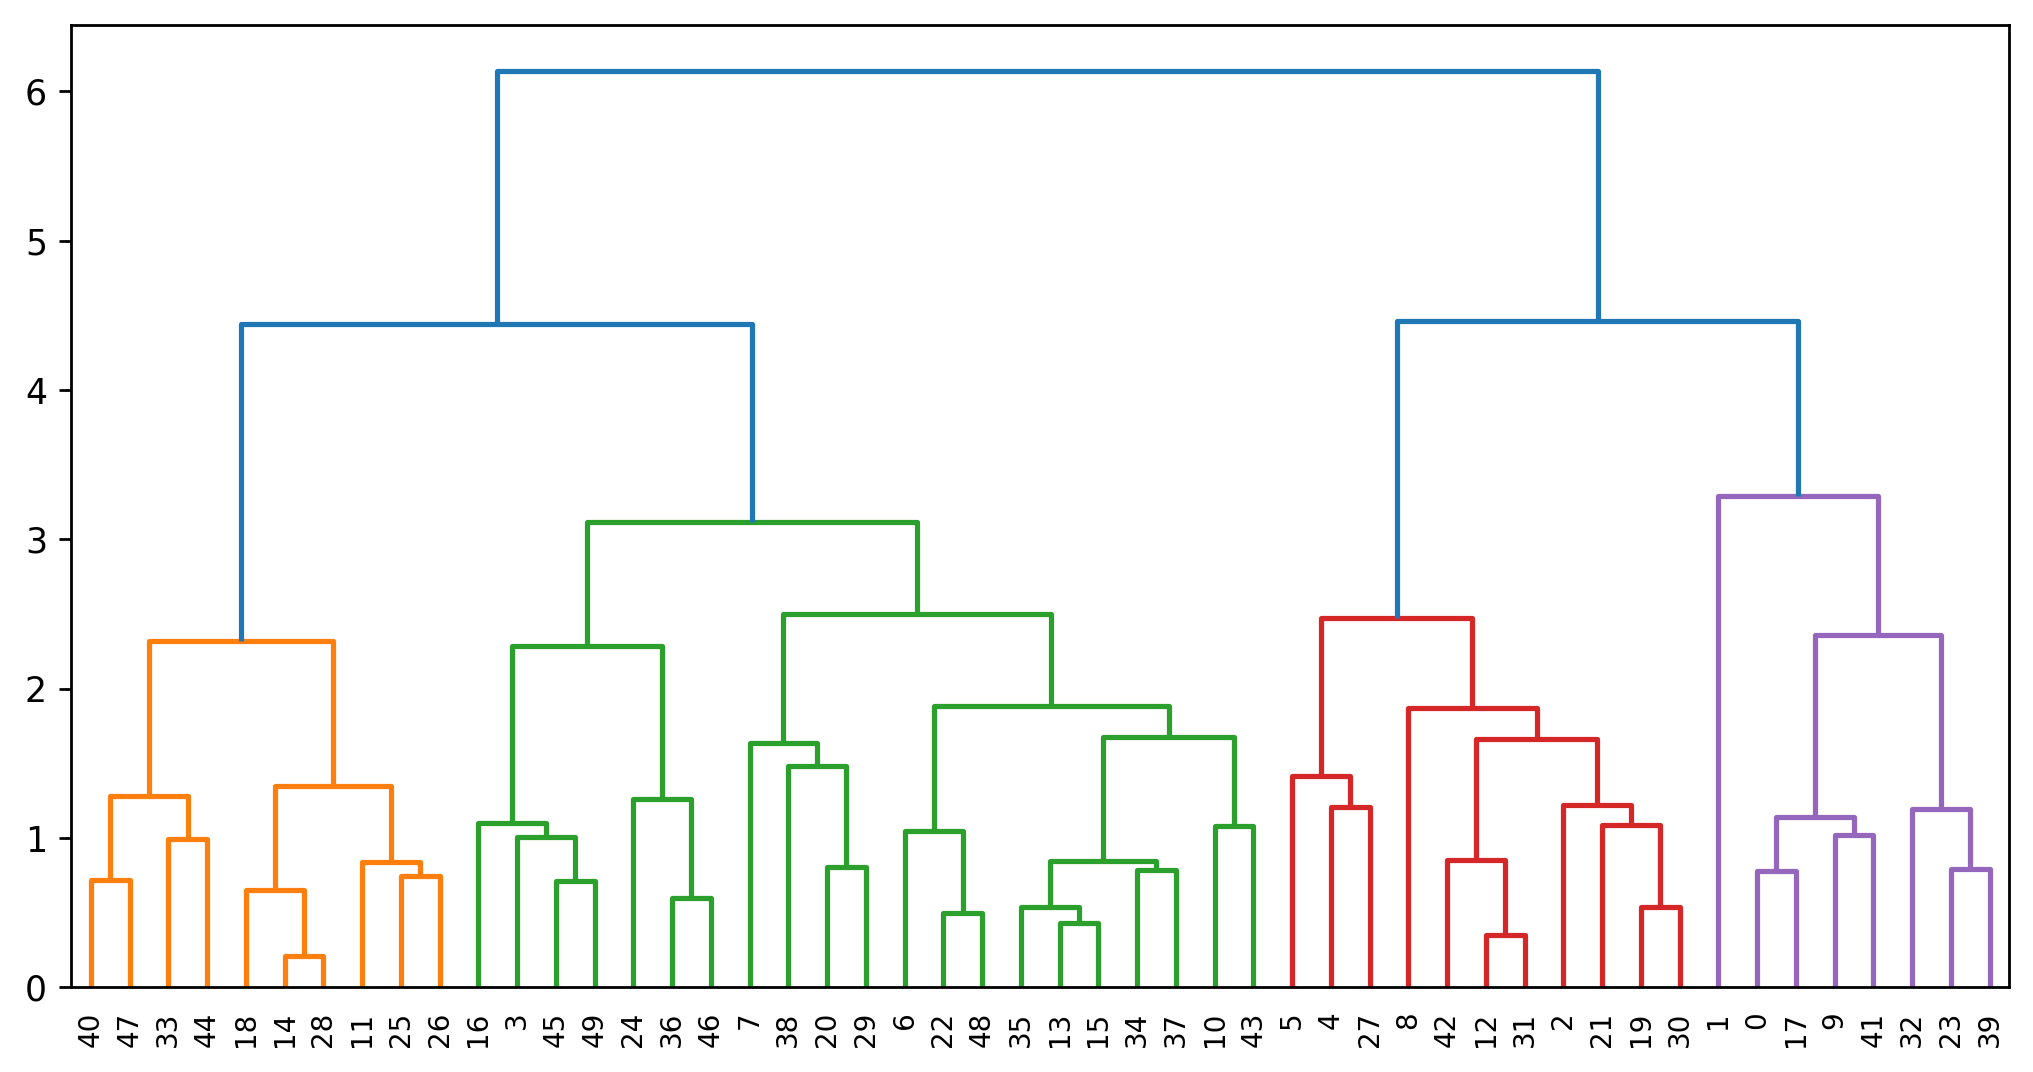

In [87]:
lk = hierarchy.linkage(x,method='complete')
dendro = hierarchy.dendrogram(lk)
plt.show()

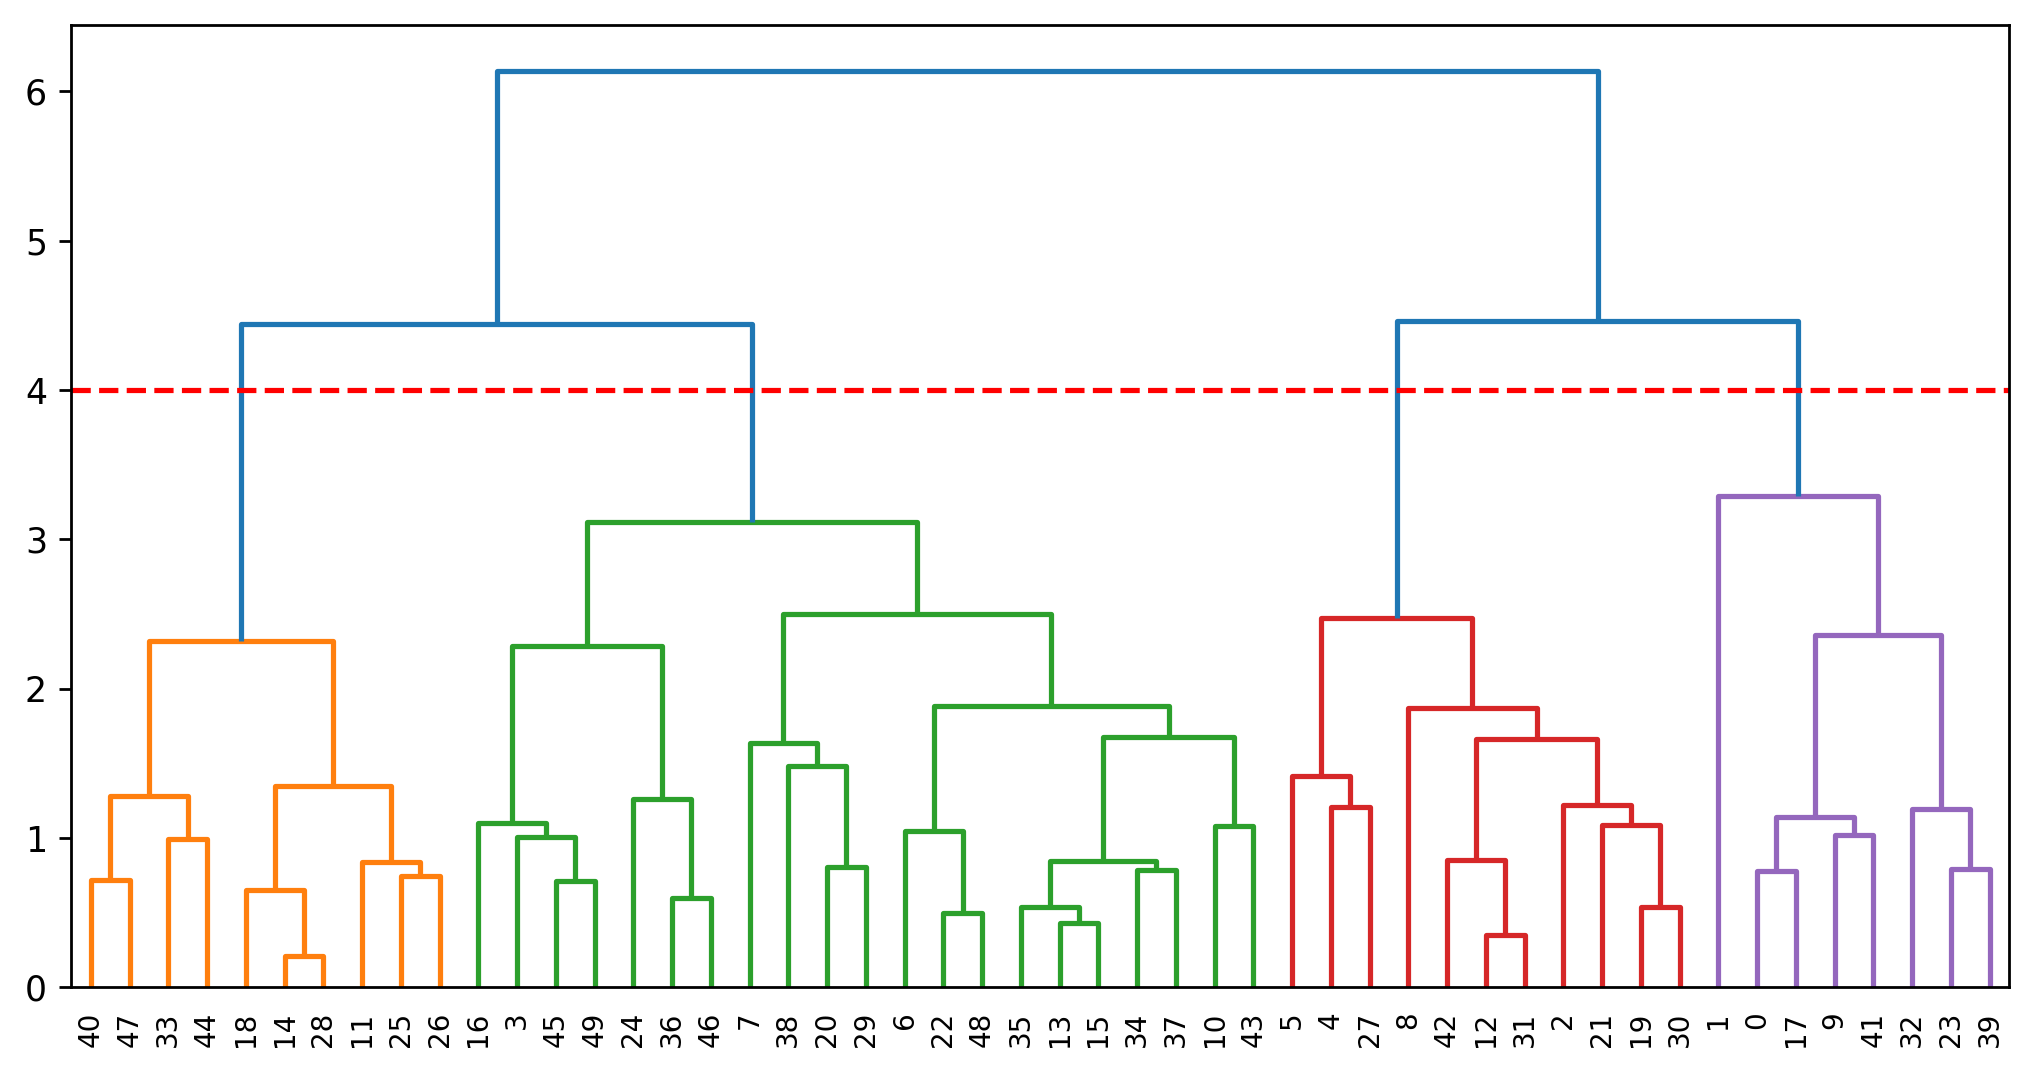

In [88]:
drndo = hierarchy.dendrogram(lk)
plt.axhline(y =4,linestyle='--',color='r')

# Model Building

In [89]:
from sklearn.cluster import AgglomerativeClustering

In [90]:
hc = AgglomerativeClustering(n_clusters=3)
y = hc.fit_predict(x)

In [91]:
y

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [92]:
df['Cluster'] = y

In [93]:
df

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [94]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,12.331579,259.315789,68.315789,29.215789
1,6.210526,142.052632,71.263158,19.184211
2,3.091667,76.000000,52.083333,11.833333


# K-Means

In [95]:
from sklearn.cluster import KMeans

In [96]:
km = KMeans()
y = km.fit_predict(x)

In [97]:
km.cluster_centers_

array([[-1.18997515, -1.12955741, -0.46637758, -0.98025239],
       [ 0.19412141,  0.1786665 ,  0.57295254,  0.99145325],
       [ 0.79648273,  1.297184  ,  0.94708922,  1.24040403],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.65691529, -0.54927896,  1.01687638, -0.37133511],
       [-0.1183334 , -0.26241054, -0.31683368, -0.3329889 ],
       [-1.08146728, -1.28193823, -1.78236392, -1.19517947],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392]])

In [98]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Elbow Graph

In [99]:
wcss=[]

for i in range (1,21):
    km= KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [100]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.63410722331145,
 44.6953395540043,
 39.20151964984215,
 37.34507473332978,
 32.36005341938822,
 29.2050444293034,
 25.320731201230576,
 22.421225735229996,
 20.40182302683582,
 19.312931062624223,
 18.211353050372878,
 16.92860447150526,
 16.195764061166305,
 15.141394660504512,
 13.916421827310309,
 13.1080833084771]

Text(0.5, 1.0, 'Elbow Curve')

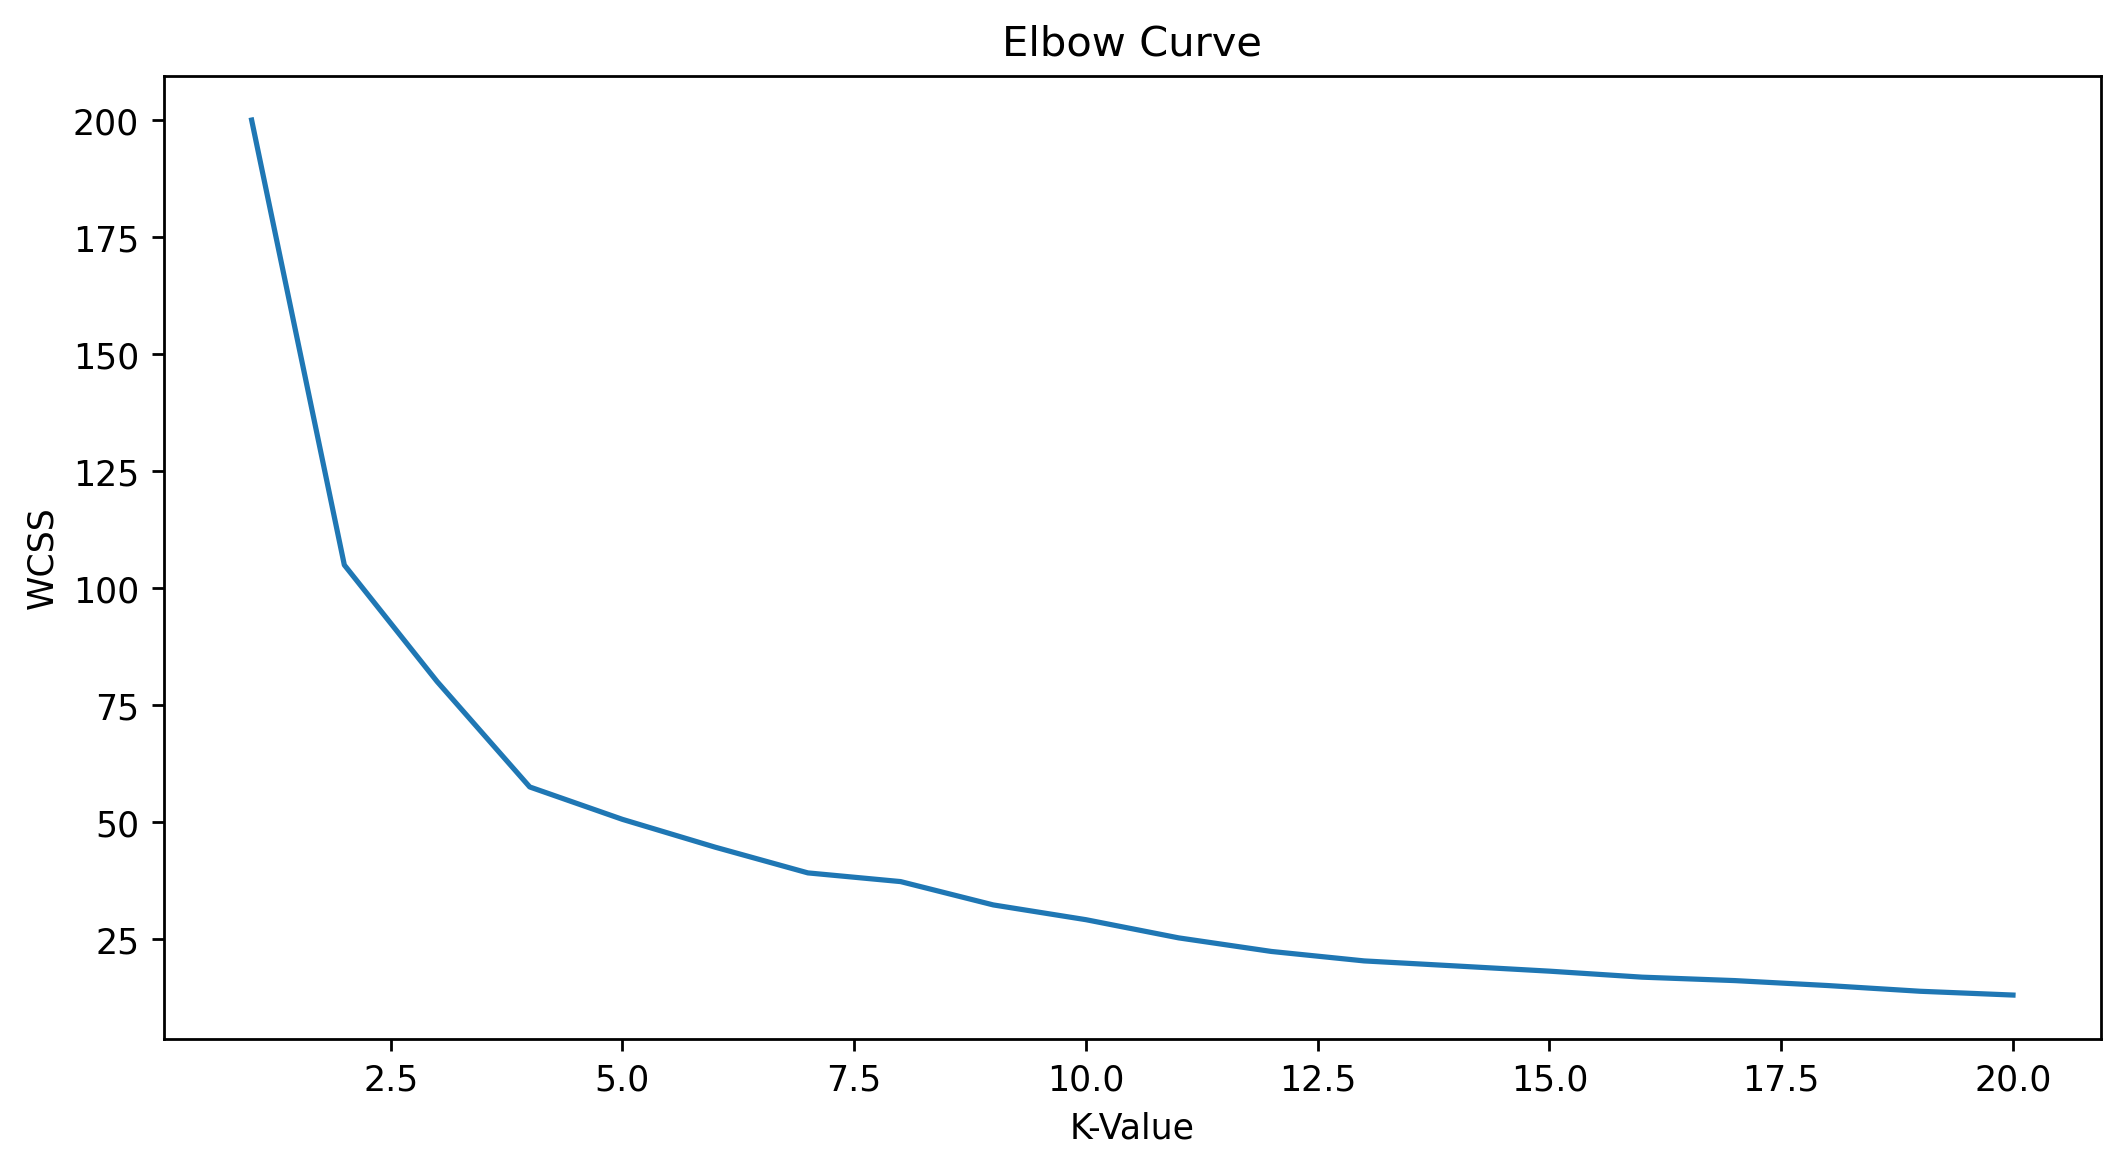

In [101]:
plt.plot(range(1,21), wcss)
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.title('Elbow Curve')

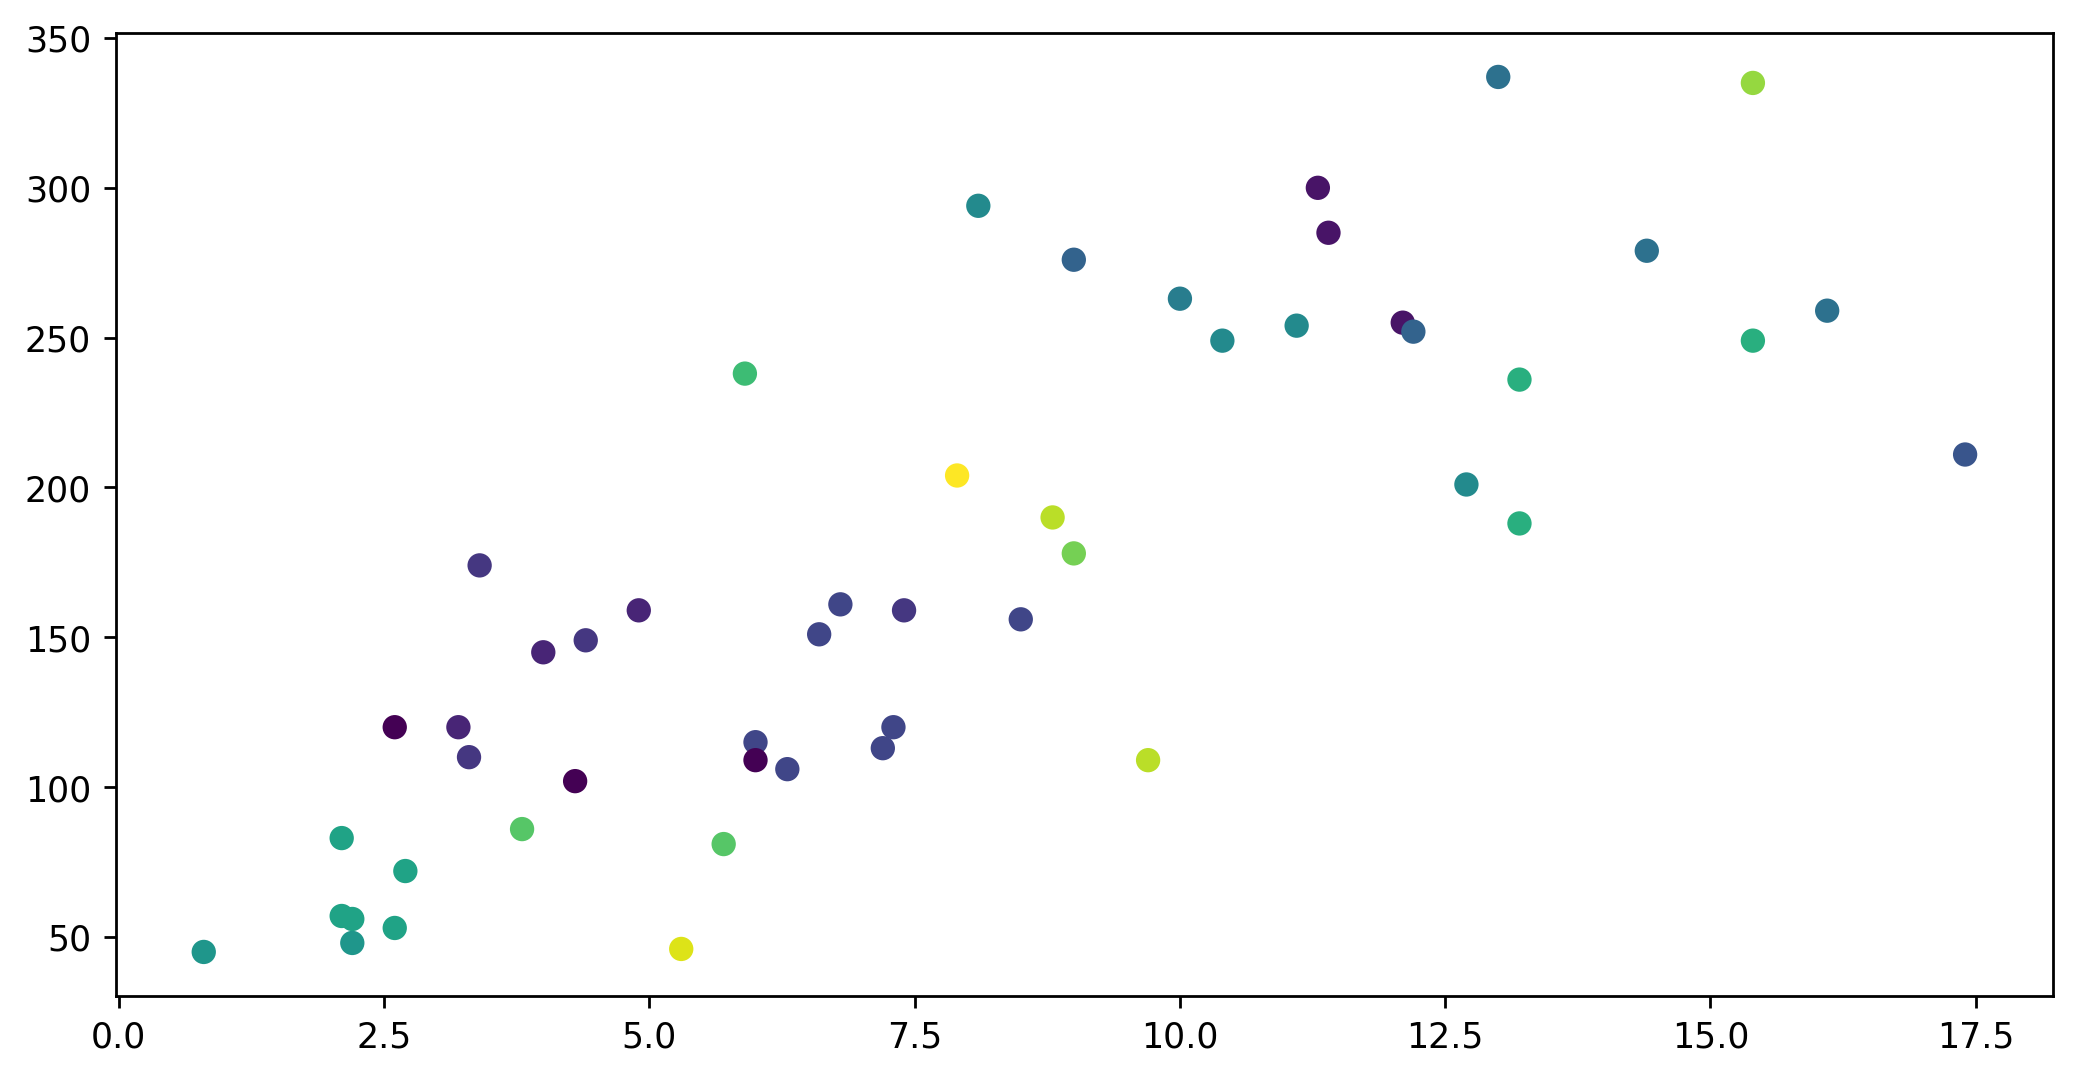

In [102]:
plt.scatter(x = df['Murder'], y = df['Assault'],c=km.labels_)

In [103]:
from sklearn.metrics import silhouette_score

In [104]:
silhouette_score(x,y)

0.2501759838769931

In [105]:
sil_score = []

for i in range(2,20):
    km = KMeans(n_clusters=i)
    y = km.fit_predict(x)
    sil_score.append(silhouette_score(x,y))

In [106]:
sil_score

[0.4084890326217641,
 0.30813622648945616,
 0.3441080718209351,
 0.3167479029976481,
 0.2855550910217569,
 0.27926653020889086,
 0.24395729379952333,
 0.24043767036274866,
 0.25638271362270404,
 0.2615624657531194,
 0.252689291398656,
 0.2618699720665615,
 0.2284768652383217,
 0.23124878990512548,
 0.26684613156481896,
 0.24220164619623116,
 0.23768818118597307,
 0.1908519282622883]

In [107]:
df['Cluster'] = y

In [108]:
df

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,6
1,10.0,263,48,44.5,13
2,8.1,294,80,31.0,15
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,10
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,5
7,5.9,238,72,15.8,18
8,15.4,335,80,31.9,11
9,17.4,211,60,25.8,6


In [109]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,7.825000,142.250000,53.750000,16.950000
1,11.400000,234.666667,83.000000,25.200000
2,10.000000,229.500000,76.000000,36.900000
3,4.250000,83.000000,81.500000,21.550000
4,13.000000,337.000000,45.000000,16.100000
5,3.300000,110.000000,77.000000,11.100000
6,15.333333,232.000000,61.333333,23.066667
7,3.125000,65.000000,40.000000,10.150000
8,6.983333,126.833333,68.166667,19.333333


# DBscan

In [110]:
dt = pd.read_csv('crime_data.csv')
dt

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [111]:
dt.rename(columns={'Unnamed: 0':'City'},inplace=True)

In [114]:
dt.drop(columns=['City'],inplace=True)

In [115]:
dt

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [116]:
x = sc.fit_transform(dt)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [117]:
from sklearn.cluster import DBSCAN

In [119]:
db =  DBSCAN(eps=1,min_samples=3)
y = db.fit_predict(x)
y

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

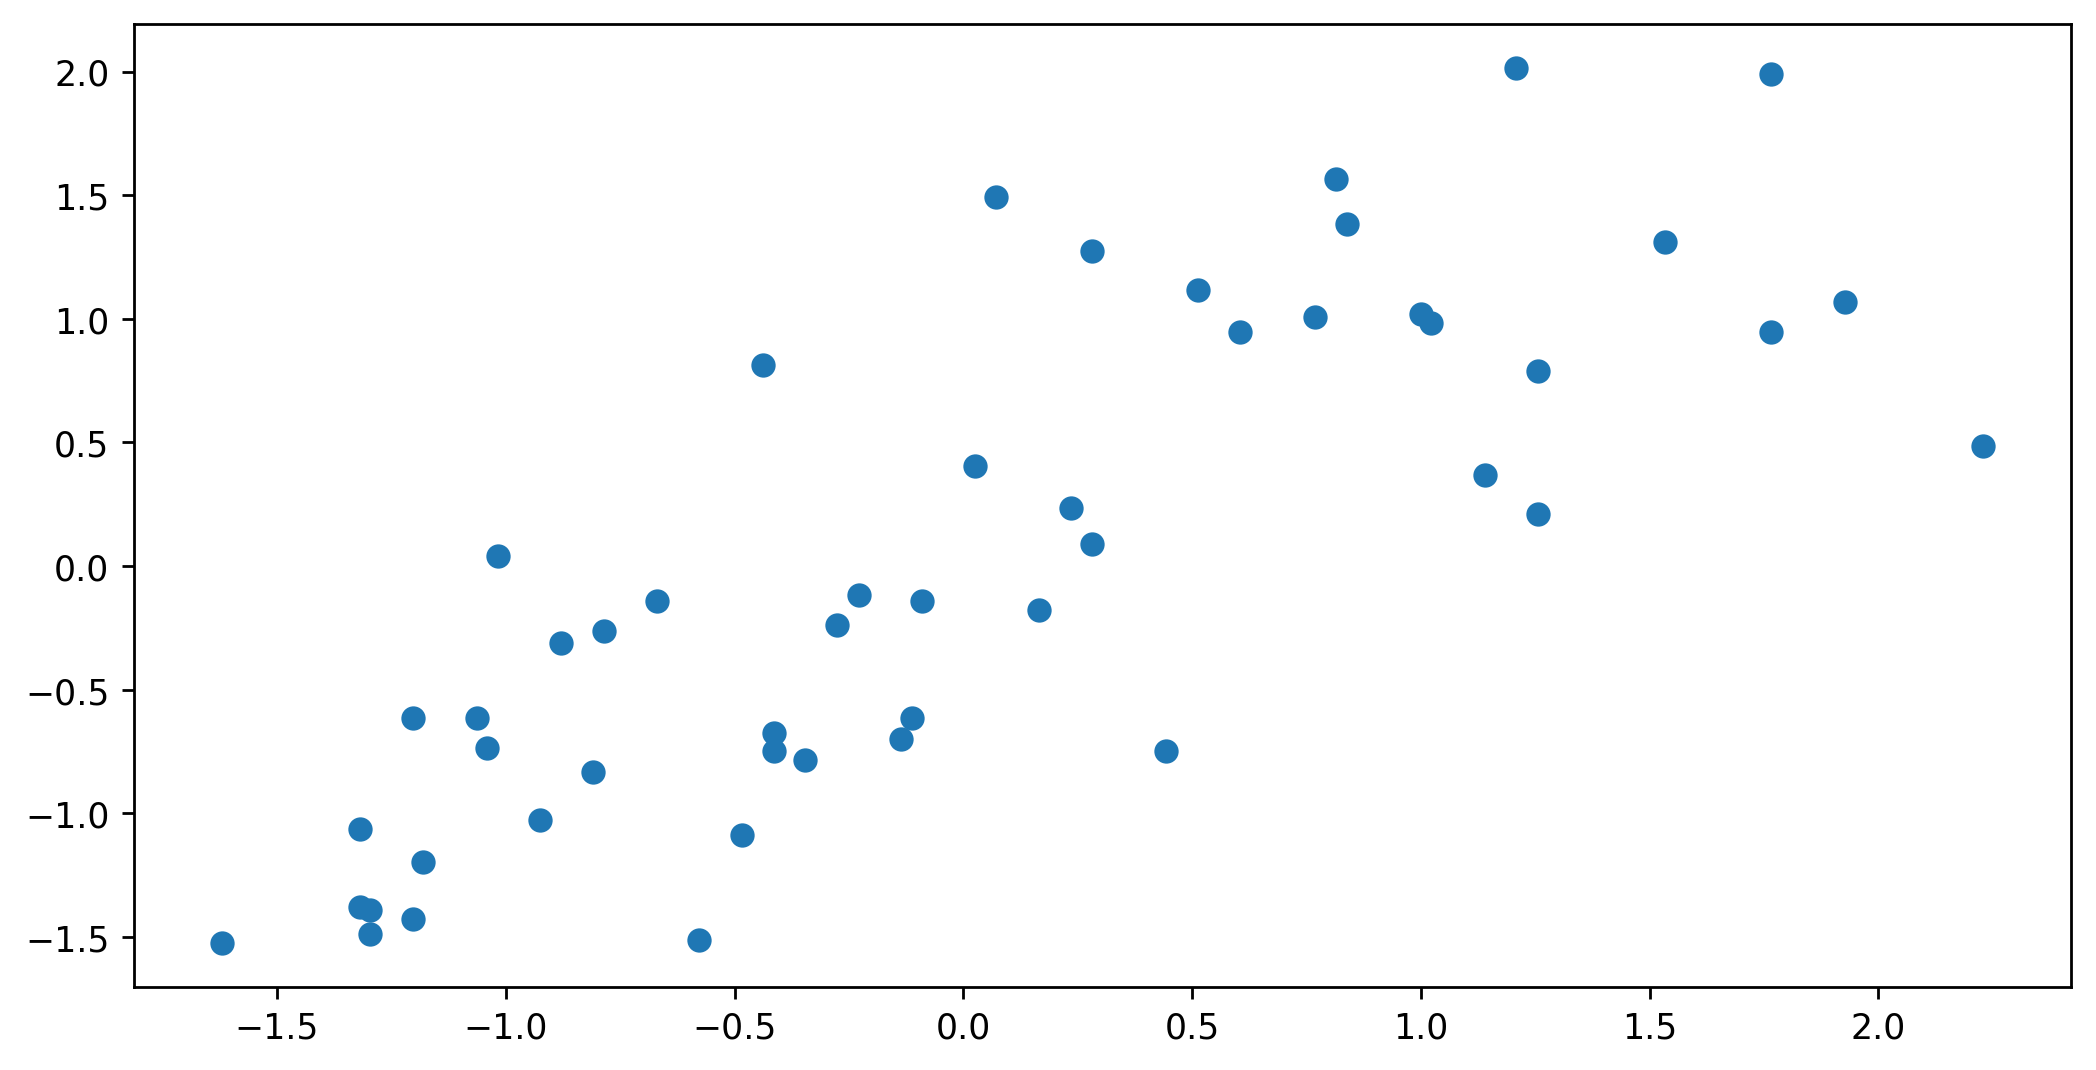

In [121]:
plt.scatter(x[:,0],x[:,1])

In [122]:
from sklearn.neighbors import NearestNeighbors

In [123]:
ne = NearestNeighbors(n_neighbors=2).fit(x)
d,i = ne.kneighbors(x)

In [124]:
d

array([[0.        , 0.78006247],
       [0.        , 2.07898369],
       [0.        , 1.0482199 ],
       [0.        , 1.0013278 ],
       [0.        , 1.20897691],
       [0.        , 1.24886253],
       [0.        , 0.88100359],
       [0.        , 1.19227586],
       [0.        , 1.30974334],
       [0.        , 0.86797806],
       [0.        , 1.08184506],
       [0.        , 0.75913104],
       [0.        , 0.35377437],
       [0.        , 0.43312429],
       [0.        , 0.2079438 ],
       [0.        , 0.43312429],
       [0.        , 0.8610239 ],
       [0.        , 0.78006247],
       [0.        , 0.50466926],
       [0.        , 0.54082482],
       [0.        , 0.80586349],
       [0.        , 0.58411812],
       [0.        , 0.49909939],
       [0.        , 0.79455301],
       [0.        , 0.98866758],
       [0.        , 0.74649625],
       [0.        , 0.53326883],
       [0.        , 1.20897691],
       [0.        , 0.2079438 ],
       [0.        , 0.80586349],
       [0.

In [125]:
pd.DataFrame(d)

,0,1
0,0.0,0.780062
1,0.0,2.078984
2,0.0,1.048220
3,0.0,1.001328
4,0.0,1.208977
5,0.0,1.248863
6,0.0,0.881004
7,0.0,1.192276
8,0.0,1.309743
9,0.0,0.867978


In [126]:
dist = np.sort(d[:,1])
dist

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

Text(0, 0.5, 'Epsilion value')

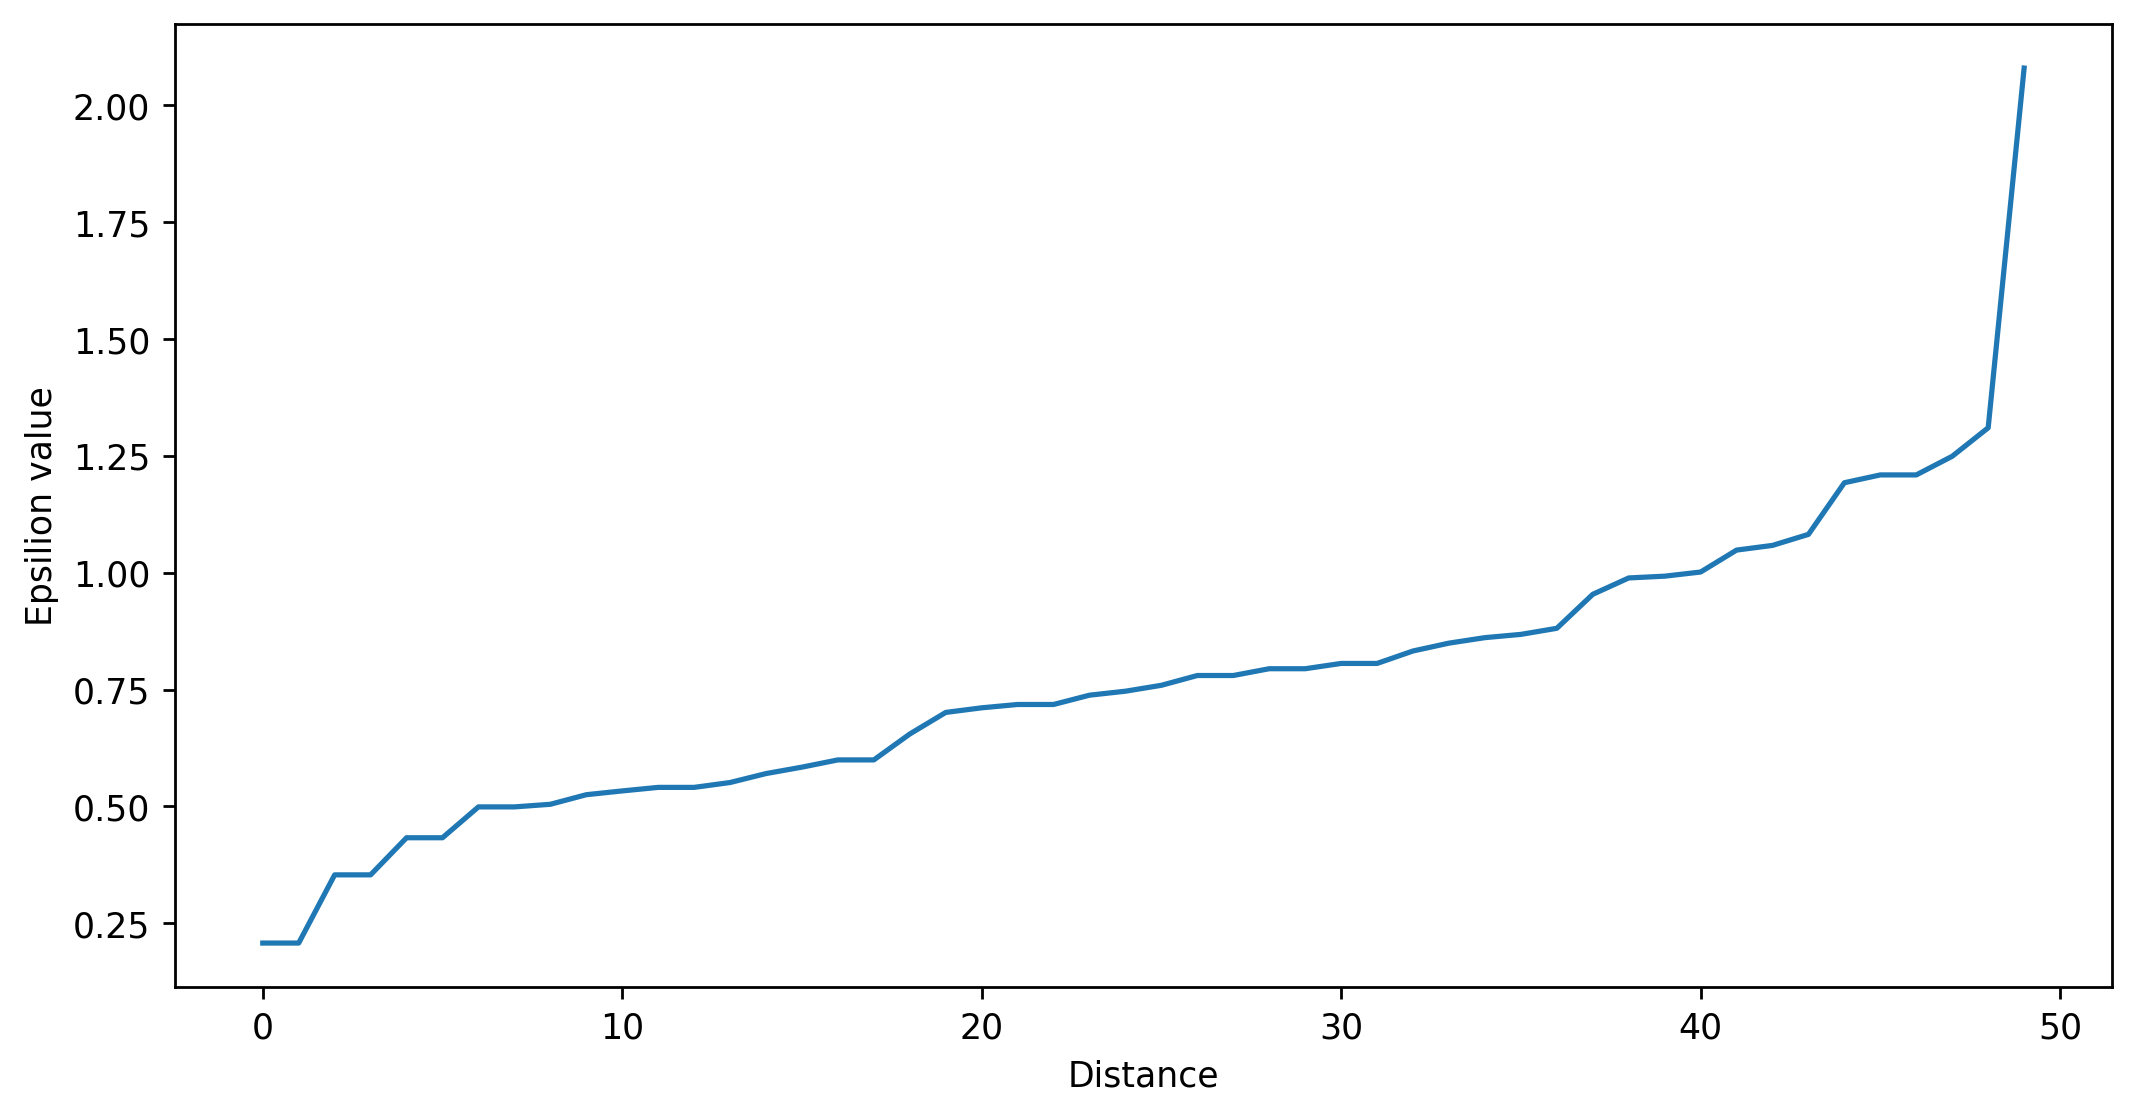

In [134]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilion value')

In [145]:
db = DBSCAN(eps=0.35,min_samples=2)
y = db.fit_predict(x)

In [146]:
dt['Cluster'] = y

In [147]:
dt

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [148]:
dt['Cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0    -1
1    -1
2    -1
3    -1
4    -1
5    -1
6    -1
7    -1
8    -1
9    -1
10   -1
11   -1
12   -1
13   -1
14    0
15   -1
16   -1
17   -1
18   -1
19   -1
20   -1
21   -1
22   -1
23   -1
24   -1
25   -1
26   -1
27   -1
28    0
29   -1
30   -1
31   -1
32   -1
33   -1
34   -1
35   -1
36   -1
37   -1
38   -1
39   -1
40   -1
41   -1
42   -1
43   -1
44   -1
45   -1
46   -1
47   -1
48   -1
49   -1
Name: Cluster, dtype: int64>

In [149]:
dt.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
-1,8.022917,175.520833,65.916667,21.683333
0,2.150000,56.500000,56.500000,10.400000
